Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols  # This is where ols comes from
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)

# Display the first few rows of the dataframe
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


#1. statistical analysis

In [4]:
columns_to_analyze = ['MathScore', 'ReadingScore', 'WritingScore']

In [5]:
# converting non numeric columns to numeric data
for col in columns_to_analyze:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
# getting mean for scores columns
means = df[columns_to_analyze].mean()
means

MathScore       66.558402
ReadingScore    69.377533
WritingScore    68.418622
dtype: float64

#2. Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [8]:
#checking for missing values
print(df.isnull().sum())

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [9]:
#droping columns of less importance
DF=df.drop(["TransportMeans", "IsFirstChild", "NrSiblings"],   axis=1)
DF.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,5 - 10,76,78,75


In [10]:
#replacing missing values with mode
ColumnName = ["EthnicGroup", "ParentEduc", "TestPrep", "ParentMaritalStatus", "PracticeSport", "WklyStudyHours"]

for col in ColumnName:
    DF[col].fillna(DF[col].mode()[0], inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_8436\1912198563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  DF[col].fillna(DF[col].mode()[0], inplace=True)


In [11]:
print(DF.isnull().sum())

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


COUNT AND FREQUENCY DISTRIBUTION FOR CATEGORICAL ATTRIBUTES

In [12]:
# Identify categorical columns
categorical_columns = ["Gender", "EthnicGroup", "ParentEduc","LunchType","ParentMaritalStatus","PracticeSport","WklyStudyHours"]

# Loop through categorical columns and display count & frequency
for col in categorical_columns:
    print(f"Distribution for {col}:")
    print(DF[col].value_counts())
    print("\nFrequency for {col}:")
    print(DF[col].value_counts(normalize=True))
    print("-" * 30)


Distribution for Gender:
Gender
female    15424
male      15217
Name: count, dtype: int64

Frequency for {col}:
Gender
female    0.503378
male      0.496622
Name: proportion, dtype: float64
------------------------------
Distribution for EthnicGroup:
EthnicGroup
group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: count, dtype: int64

Frequency for {col}:
EthnicGroup
group C    0.360693
group D    0.244868
group B    0.190137
group E    0.131882
group A    0.072419
Name: proportion, dtype: float64
------------------------------
Distribution for ParentEduc:
ParentEduc
some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: count, dtype: int64

Frequency for {col}:
ParentEduc
some college          0.276688
high school           0.185601
associate's degree    0.181130
some high school      0.180053
bachelor's degree     0.110506
master's deg

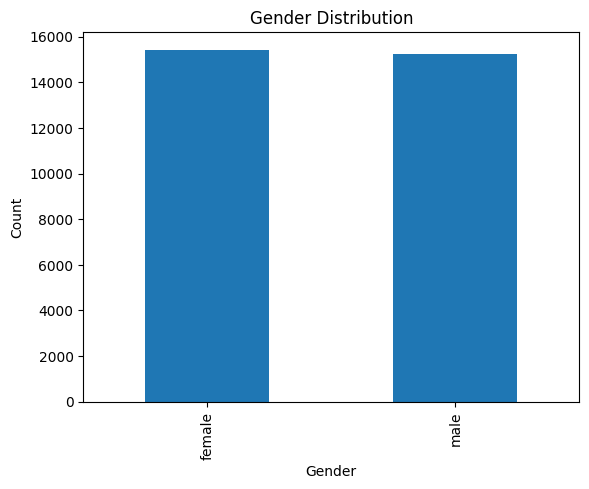

In [13]:
# Bar plot for Gender
DF["Gender"].value_counts().plot(kind="bar", title="Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


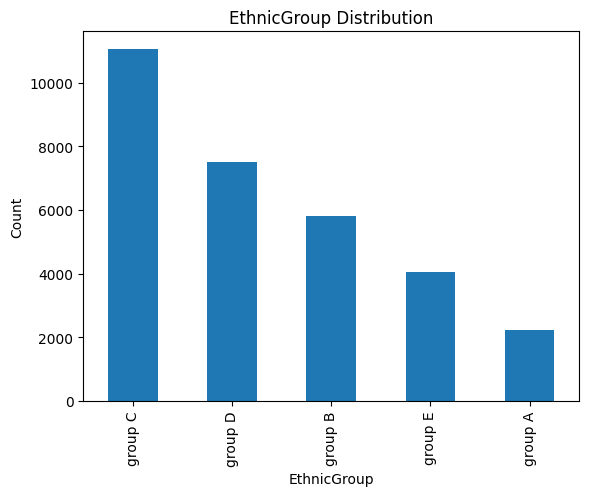

In [14]:
# Bar plot for EthnicGroup
DF["EthnicGroup"].value_counts().plot(kind="bar", title="EthnicGroup Distribution")
plt.xlabel("EthnicGroup")
plt.ylabel("Count")
plt.show()


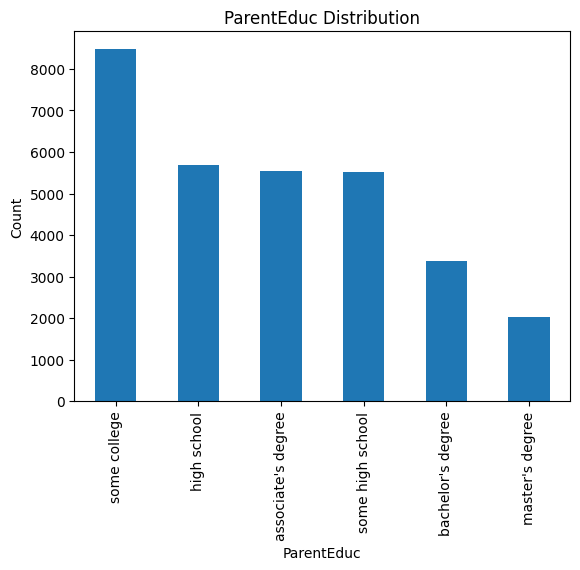

In [15]:
# Bar plot for ParentEduc
DF["ParentEduc"].value_counts().plot(kind="bar", title="ParentEduc Distribution")
plt.xlabel("ParentEduc")
plt.ylabel("Count")
plt.show()


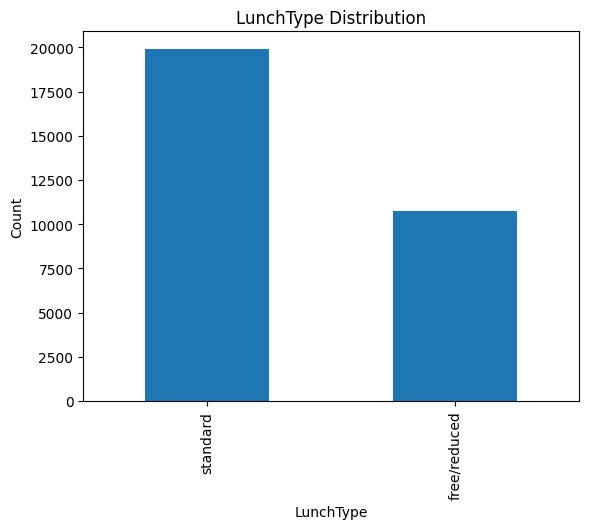

In [16]:
# Bar plot for LunchType
DF["LunchType"].value_counts().plot(kind="bar", title="LunchType Distribution")
plt.xlabel("LunchType")
plt.ylabel("Count")
plt.show()


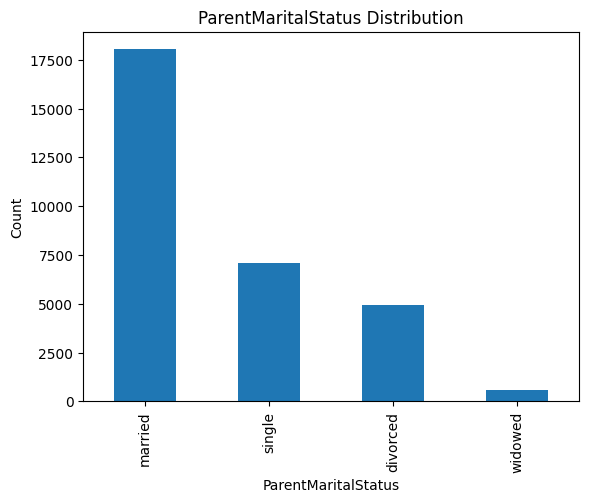

In [17]:
# Bar plot for ParentMaritalStatus
DF["ParentMaritalStatus"].value_counts().plot(kind="bar", title="ParentMaritalStatus Distribution")
plt.xlabel("ParentMaritalStatus")
plt.ylabel("Count")
plt.show()

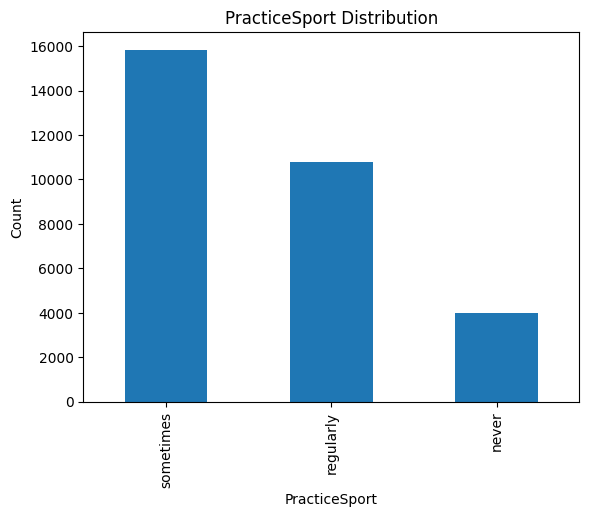

In [18]:
# Bar plot for PracticeSport
DF["PracticeSport"].value_counts().plot(kind="bar", title="PracticeSport Distribution")
plt.xlabel("PracticeSport")
plt.ylabel("Count")
plt.show()

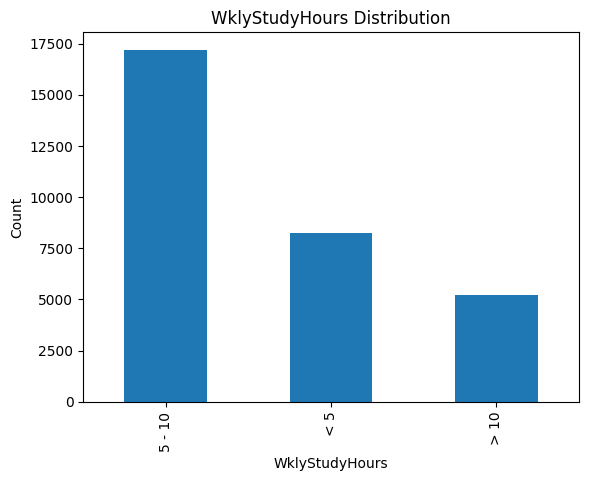

In [19]:
# Bar plot for WklyStudyHours
DF["WklyStudyHours"].value_counts().plot(kind="bar", title="WklyStudyHours Distribution")
plt.xlabel("WklyStudyHours")
plt.ylabel("Count")
plt.show()

COMPARING GENDER AND TEST RESULTS

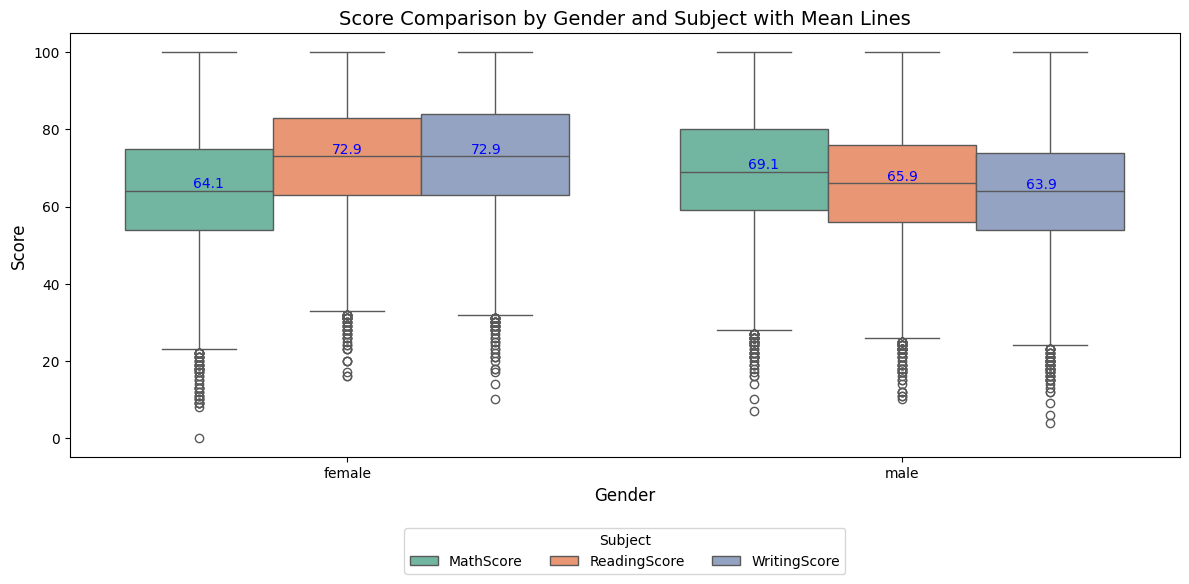

In [20]:
# Group by Gender and Subject to calculate means
gender_subject_means = DF.groupby('Gender')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()

# Melt the dataframe for easier plotting with Seaborn
melted_DF = DF.melt(id_vars=['Gender'], value_vars=['MathScore', 'ReadingScore', 'WritingScore'],
                    var_name='Subject', value_name='Score')

# Initialize the figure
plt.figure(figsize=(12, 6))

# Create the boxplot
box = sns.boxplot(x='Gender', y='Score', hue='Subject', data=melted_DF, palette='Set2')

# Get x-tick positions for boxplot groups
group_positions = box.get_xticks()

# Compute offsets for each subject (to match the number of hues)
hue_offset = [-0.25, 0, 0.25]  # Adjust based on how seaborn spaces hues
positions = [pos + offset for pos in group_positions for offset in hue_offset]

# Overlay mean scores using computed positions
for gender_index, gender in enumerate(['female', 'male']):
    means = gender_subject_means[gender_subject_means['Gender'] == gender].iloc[:, 1:].values.flatten()
    start_idx = gender_index * 3  # Each gender has three subjects
    for offset, mean in enumerate(means):
        x_position = positions[start_idx + offset]
        plt.text(x_position, mean, f'{mean:.1f}', ha='center', va='bottom', color='blue', fontsize=10)

# Add titles and labels
plt.title('Score Comparison by Gender and Subject with Mean Lines', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Adjust the legend position
plt.legend(title='Subject', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Show the plot
plt.tight_layout()
plt.show()


#getting more insight for gender vs mathscore

In [21]:
# Grouping by Gender and calculating statistics
summary_stats = DF.groupby('Gender')['MathScore'].describe()
print(summary_stats)

          count       mean        std  min   25%   50%   75%    max
Gender                                                             
female  15424.0  64.080654  15.238172  0.0  54.0  64.0  75.0  100.0
male    15217.0  69.069856  15.076223  7.0  59.0  69.0  80.0  100.0


In [22]:
# Define male_scores
male_scores = DF[DF['Gender'] == 'male']['MathScore']
mean_male= 69.069856

# Define female_scores
female_scores = DF[DF['Gender'] == 'female']['MathScore']
mean_female= 64.080654


In [23]:
#resampling to enable performance of t-test
min_size = min(len(male_scores), len(female_scores))
sample_male = male_scores.sample(min_size, random_state=42)
sample_female = female_scores.sample(min_size, random_state=42)


In [24]:
# Performing the t-test
t_stat, p_value = ttest_ind(male_scores, female_scores, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 28.807257515424794, P-value: 4.400611656859241e-180


C:\Users\USER\AppData\Local\Temp\ipykernel_8436\1726037730.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_scores, label='Male', shade=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8436\1726037730.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_scores, label='Female', shade=True)


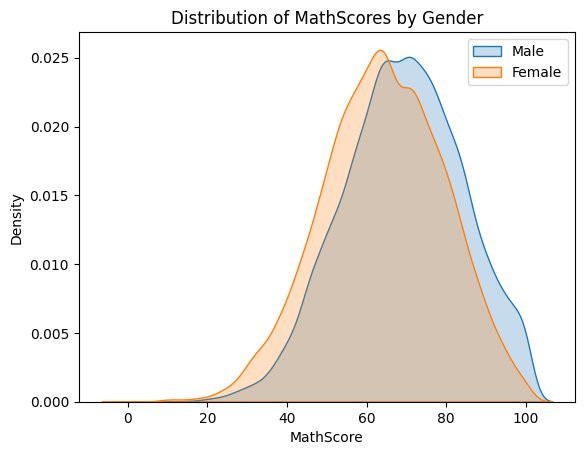

In [25]:
#visualizing diistribution by histogram
sns.kdeplot(male_scores, label='Male', shade=True)
sns.kdeplot(female_scores, label='Female', shade=True)
plt.title('Distribution of MathScores by Gender')
plt.legend()
plt.show()

the p-value shows significant diff in mathscores with respect to gender
to better understand the magnitude of diff:

In [26]:
#checking effect size using Cohen's d
mean_diff = mean_male - mean_female
pooled_std = np.sqrt(((male_scores.std()**2) + (female_scores.std()**2)) / 2)
cohen_d = mean_diff / pooled_std
print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.3291591858481025


COMPARING PARENTEDU AND TEST RESULTS

In [27]:
#Using ANOVA to compare test results as against parentedu
# Math Score
groups_math = [DF[DF['ParentEduc'] == level]['MathScore'] for level in DF['ParentEduc'].unique()]
anova_math = f_oneway(*groups_math)
print(f'Math Score ANOVA: F-statistic = {anova_math.statistic}, p-value = {anova_math.pvalue}')

# Writing Score
groups_writing = [DF[DF['ParentEduc'] == level]['WritingScore'] for level in DF['ParentEduc'].unique()]
anova_writing = f_oneway(*groups_writing)
print(f'Writing Score ANOVA: F-statistic = {anova_writing.statistic}, p-value = {anova_writing.pvalue}')

# Reading Score
groups_reading = [DF[DF['ParentEduc'] == level]['ReadingScore'] for level in DF['ParentEduc'].unique()]
anova_reading = f_oneway(*groups_reading)
print(f'Reading Score ANOVA: F-statistic = {anova_reading.statistic}, p-value = {anova_reading.pvalue}')


Math Score ANOVA: F-statistic = 219.665787210337, p-value = 4.3746378254295243e-231
Writing Score ANOVA: F-statistic = 360.719095284088, p-value = 0.0
Reading Score ANOVA: F-statistic = 244.9920791738841, p-value = 1.6450927207676856e-257


In [28]:
##checking to know the specific groups that are contributing to these significant difference
# For Math Score
model_math = ols('MathScore ~ C(ParentEduc)', data=DF).fit()
anova_math = sm.stats.anova_lm(model_math, typ=2)

# For Writing Score
model_writing = ols('WritingScore ~ C(ParentEduc)', data=DF).fit()
anova_writing = sm.stats.anova_lm(model_writing, typ=2)

# For Reading Score
model_reading = ols('ReadingScore ~ C(ParentEduc)', data=DF).fit()
anova_reading = sm.stats.anova_lm(model_reading, typ=2)


In [29]:
# Tukey's HSD for Math Score
tukey_math = pairwise_tukeyhsd(DF['MathScore'], DF['ParentEduc'], alpha=0.05)

# Tukey's HSD for Writing Score
tukey_writing = pairwise_tukeyhsd(DF['WritingScore'], DF['ParentEduc'], alpha=0.05)

# Tukey's HSD for Reading Score
tukey_reading = pairwise_tukeyhsd(DF['ReadingScore'], DF['ParentEduc'], alpha=0.05)


In [30]:
# Display Tukey's HSD results
print(tukey_math.summary())
print(tukey_writing.summary())
print(tukey_reading.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2      meandiff p-adj   lower    upper  reject
----------------------------------------------------------------------------
associate's degree bachelor's degree    2.101    0.0    1.163  3.0391   True
associate's degree       high school  -3.9299    0.0  -4.7415 -3.1182   True
associate's degree   master's degree   3.9705    0.0   2.8533  5.0878   True
associate's degree      some college  -1.9196    0.0  -2.6624 -1.1768   True
associate's degree  some high school  -5.7816    0.0  -6.5994 -4.9637   True
 bachelor's degree       high school  -6.0309    0.0  -6.9647 -5.0971   True
 bachelor's degree   master's degree   1.8695 0.0002   0.6607  3.0783   True
 bachelor's degree      some college  -4.0206    0.0  -4.8952 -3.1461   True
 bachelor's degree  some high school  -7.8826    0.0  -8.8217 -6.9435   True
       high school   master's degree   7.9004    0.0   6.7868   9.014   True

Correlation Analysis to check influence of study hour

In [31]:
# confirming unique values of 'WklyStudyHours' for mapping
unique_values = DF['WklyStudyHours'].unique()
print(unique_values)

['< 5' '5 - 10' '> 10']


Correlation Analysis:
Math Score vs Study Hours: Pearson = 0.089, p-value = 0.00000
Writing Score vs Study Hours: Pearson = 0.058, p-value = 0.00000
Reading Score vs Study Hours: Pearson = 0.051, p-value = 0.00000


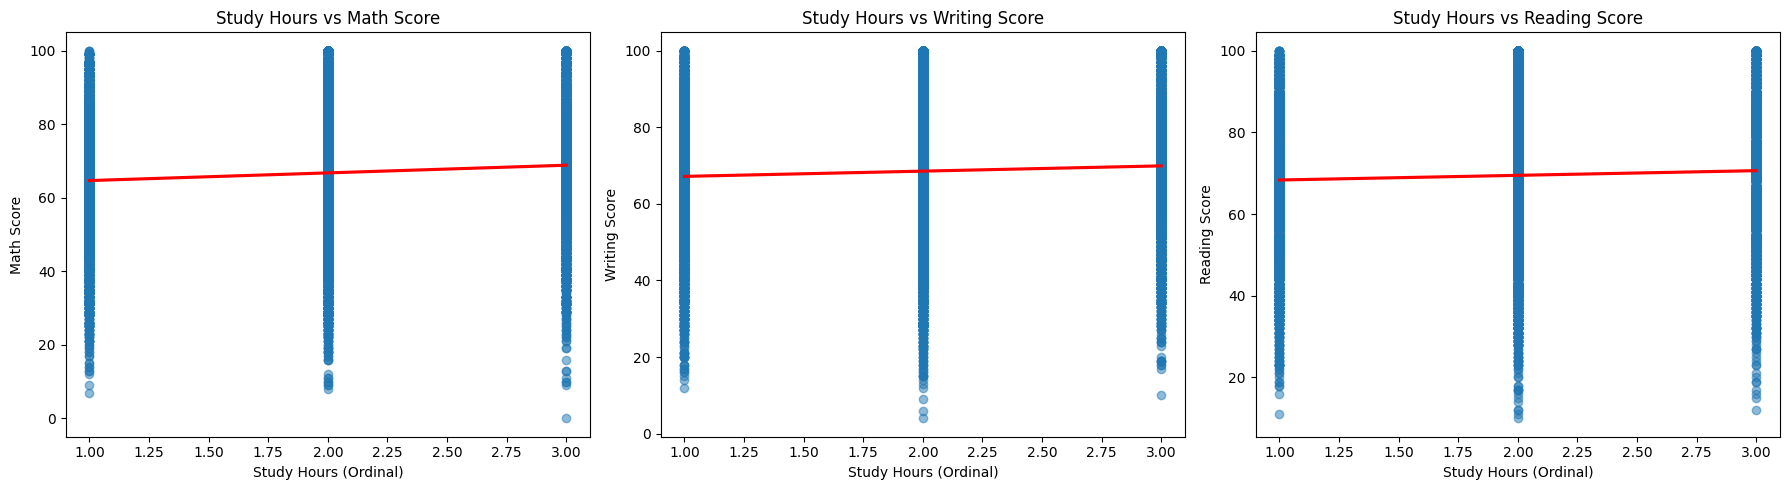

In [32]:
# Map ordinal values to study hour categories
study_hours_mapping = {
    "< 5": 1,
    "5 - 10": 2,
    "> 10": 3,
}

#mapping study hour
DF["WklyStudyHours"] = DF["WklyStudyHours"].map(study_hours_mapping)
# Drop rows with NaN values in Study Hours
DF = DF.dropna(subset=["WklyStudyHours"])

# Perform correlation analysis
correlation_math = stats.pearsonr(DF["WklyStudyHours"], DF["MathScore"])
correlation_writing = stats.pearsonr(DF["WklyStudyHours"], DF["WritingScore"])
correlation_reading = stats.pearsonr(DF["WklyStudyHours"], DF["ReadingScore"])

# Print correlation results
print("Correlation Analysis:")
print(f"Math Score vs Study Hours: Pearson = {correlation_math[0]:.3f}, p-value = {correlation_math[1]:.5f}")
print(f"Writing Score vs Study Hours: Pearson = {correlation_writing[0]:.3f}, p-value = {correlation_writing[1]:.5f}")
print(f"Reading Score vs Study Hours: Pearson = {correlation_reading[0]:.3f}, p-value = {correlation_reading[1]:.5f}")

# Generate scatter plots with regression lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x=DF["WklyStudyHours"], y=DF["MathScore"], ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('Study Hours vs Math Score')
axes[0].set_xlabel('Study Hours (Ordinal)')
axes[0].set_ylabel('Math Score')

sns.regplot(x=DF["WklyStudyHours"], y=DF["WritingScore"], ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title('Study Hours vs Writing Score')
axes[1].set_xlabel('Study Hours (Ordinal)')
axes[1].set_ylabel('Writing Score')

sns.regplot(x=DF["WklyStudyHours"], y=DF["ReadingScore"], ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title('Study Hours vs Reading Score')
axes[2].set_xlabel('Study Hours (Ordinal)')
axes[2].set_ylabel('Reading Score')

plt.tight_layout()
plt.show()


checking for the influence of parents marital status

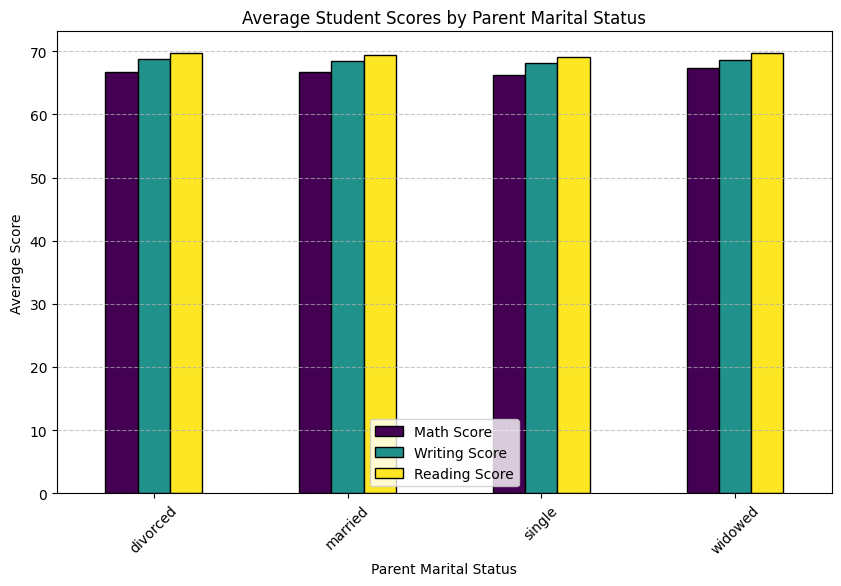

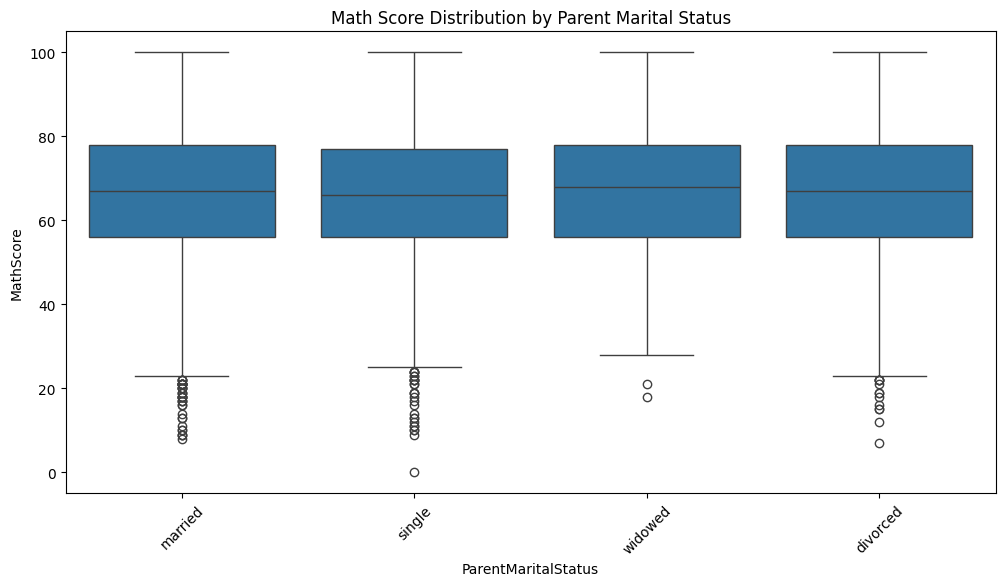

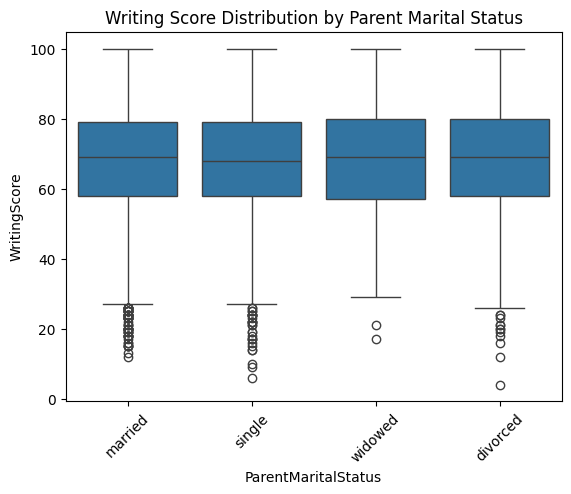

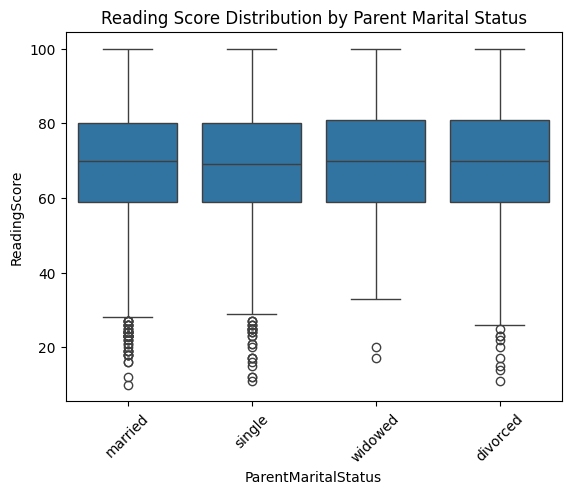

In [33]:
# Grouping by Parent Marital Status and calculating mean scores
score_means = DF.groupby("ParentMaritalStatus")[["MathScore", "WritingScore", "ReadingScore"]].mean()

# Plot bar chart
score_means.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")
plt.title("Average Student Scores by Parent Marital Status")
plt.ylabel("Average Score")
plt.xlabel("Parent Marital Status")
plt.xticks(rotation=45)
plt.legend(["Math Score", "Writing Score", "Reading Score"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Boxplot to show score distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x="ParentMaritalStatus", y="MathScore", data=DF)
plt.title("Math Score Distribution by Parent Marital Status")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="ParentMaritalStatus", y="WritingScore", data=DF)
plt.title("Writing Score Distribution by Parent Marital Status")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="ParentMaritalStatus", y="ReadingScore", data=DF)
plt.title("Reading Score Distribution by Parent Marital Status")
plt.xticks(rotation=45)
plt.show()


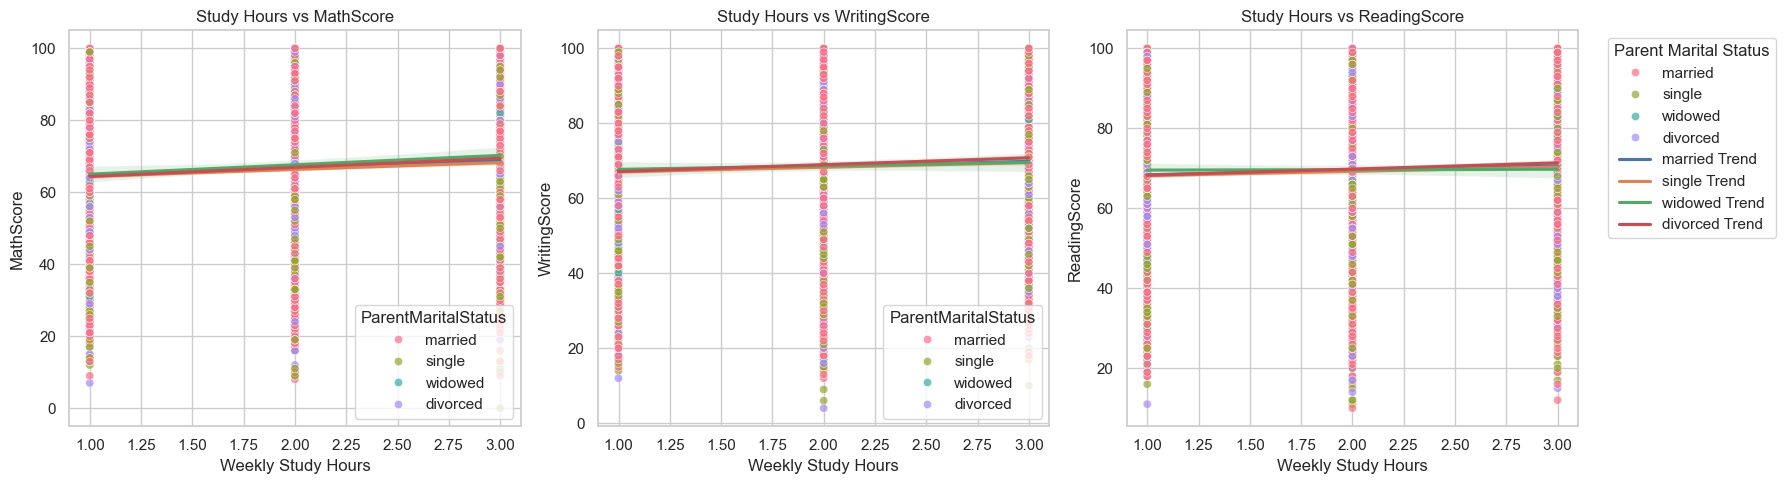


Correlation Analysis by Parent Marital Status:
MathScore - married: Pearson = 0.086, p-value = 0.00000
WritingScore - married: Pearson = 0.056, p-value = 0.00000
ReadingScore - married: Pearson = 0.049, p-value = 0.00000
MathScore - single: Pearson = 0.081, p-value = 0.00000
WritingScore - single: Pearson = 0.052, p-value = 0.00001
ReadingScore - single: Pearson = 0.046, p-value = 0.00009
MathScore - widowed: Pearson = 0.109, p-value = 0.00807
WritingScore - widowed: Pearson = 0.039, p-value = 0.33801
ReadingScore - widowed: Pearson = 0.005, p-value = 0.91193
MathScore - divorced: Pearson = 0.107, p-value = 0.00000
WritingScore - divorced: Pearson = 0.077, p-value = 0.00000
ReadingScore - divorced: Pearson = 0.068, p-value = 0.00000


In [34]:
from scipy.stats import pearsonr

# Set style
sns.set(style="whitegrid")

# Define the subjects
subjects = ["MathScore", "WritingScore", "ReadingScore"]

# Define color palette
palette = sns.color_palette("husl", len(DF["ParentMaritalStatus"].unique()))

# Create scatter plots with trend lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, subject in enumerate(subjects):
    ax = axes[i]
    sns.scatterplot(data=DF, x="WklyStudyHours", y=subject, hue="ParentMaritalStatus", palette=palette, alpha=0.7, ax=ax)
    
    # Add trend lines for each marital status category
    for status in DF["ParentMaritalStatus"].unique():
        subset = DF[DF["ParentMaritalStatus"] == status]
        if not subset.empty:
            sns.regplot(data=subset, x="WklyStudyHours", y=subject, scatter=False, label=f"{status} Trend", ax=ax)
    
    ax.set_title(f"Study Hours vs {subject}")
    ax.set_xlabel("Weekly Study Hours")
    ax.set_ylabel(subject)

plt.legend(title="Parent Marital Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation Analysis
print("\nCorrelation Analysis by Parent Marital Status:")
for status in DF["ParentMaritalStatus"].unique():
    subset = DF[DF["ParentMaritalStatus"] == status]
    if not subset.empty:
        for subject in subjects:
            corr, p_value = pearsonr(subset["WklyStudyHours"], subset[subject])
            print(f"{subject} - {status}: Pearson = {corr:.3f}, p-value = {p_value:.5f}")


carrying out multivariate analysis to determine most influential factor

In [35]:
# Step 1: Drop the columns you don't need for the analysis
DF_cleaned = DF.drop(columns=['EthnicGroup', 'LunchType', 'PracticeSport'])

# Step 2: One-hot encode the remaining categorical variables
DF_encoded = pd.get_dummies(DF_cleaned, columns=['Gender', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus'], drop_first=True)

# Step 3: Convert all boolean columns to integers (True -> 1, False -> 0)
DF_encoded = DF_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Step 4: Define independent variables (predictors)
X = DF_encoded.drop(columns=['MathScore', 'WritingScore', 'ReadingScore'])

# Step 5: Define dependent variables (targets)
y_math = DF_encoded['MathScore']
y_writing = DF_encoded['WritingScore']
y_reading = DF_encoded['ReadingScore']

In [36]:
# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)

# Step 4: Fit models for each dependent variable
# MathScore model
model_math = sm.OLS(y_math, X).fit()
print("Math Score Model Summary")
print(model_math.summary())

# WritingScore model
model_writing = sm.OLS(y_writing, X).fit()
print("\nWriting Score Model Summary")
print(model_writing.summary())

# ReadingScore model
model_reading = sm.OLS(y_reading, X).fit()
print("\nReading Score Model Summary")
print(model_reading.summary())


Math Score Model Summary
                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:06:32   Log-Likelihood:            -1.2577e+05
No. Observations:               30641   AIC:                         2.516e+05
Df Residuals:                   30629   BIC:                         2.517e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------